In [181]:
import numpy as np
import matplotlib.pyplot as plt

In [182]:
def quantize(signal, bits, vmin=-1.0, vmax=1.0):
    levels = 2 ** bits
    step = (vmax - vmin) / levels #step = LSB weight (change in 1 bit after the chnage in weight)
    
    quantized = []

    for x in signal:
        code = np.floor((x - vmin) / step)
        x_q = (code + 0.5) * step + vmin
        quantized.append(x_q)
    return np.array(quantized)

In [183]:
def plot_function(t, q_signal, bits, signal):
    plt.plot(t, q_signal, label=f"{bits}-bit Quantized")

# Plot original analog signal
    plt.plot(t, signal, 'k--', linewidth=2, label="Original Signal")

    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title("ADC Quantization of a Sine Wave at Different Bit Depths")
    plt.legend()
    plt.grid(True)
    plt.show()

In [184]:
def display_binary_output(q_signal, LSB_weight, bits):
    output = []
    Amp_min = min(q_signal)
    for index, val in enumerate(q_signal):
        code = int((val - Amp_min)/LSB_weight)
        #     print(val, code)
        output.append(bin(code)[2:])
    binary_output = [f"{int(i, 2):0{bits}b}" for i in output]
#     print(binary_output)

In [185]:
def ADC(signal, bits, Vref, t): #A Complte ADC Function, returns Binary code
    q_signal = quantize(signal, bits)
    LSB_weight = Vref/ (2**bits)
    # print(LSB_weight)
    plot_function(t, q_signal, bits, signal)
    display_binary_output(q_signal, LSB_weight, bits)
    return q_signal
    

In [186]:
def display_histogram(signal, fs):
    t = np.linspace(0, 2 * np.pi, fs)
#     display_signal = np.sin(t)
    display_signal = signal

    # --- Plot 1: The Sine Wave ---
    plt.figure(figsize=(10, 4))
    plt.plot(t, display_signal, color='blue', linewidth=2)
    plt.title("Quantized Signal: Value vs. Time")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # --- Plot 2: Histogram with the "Following" Line ---
    plt.figure(figsize=(10, 6))

# Plot histogram (density=True ensures the line and bars use the same scale)
    plt.hist(display_signal, bins=100, density=True, color='skyblue', alpha=0.5, edgecolor='white', label='Histogram')

    plt.title("Histogram")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

In [187]:
# initialization of function and ADC

f_signal = 2         # Signal frequency = 5 Hz
fs = 10000           # Sampling rate = 100 samples per second
t = np.linspace(0, 1, fs)   # Time axis: 1 second duration
Vref_max  = 1.0
Vref_min = -1.0
Vref = Vref_max - Vref_min

# Analog signal (what comes from antenna):
analog_signal_sin = np.sin(2 * np.pi * f_signal * t)
ramp_signal = t
analog_signal_cos = np.cos(2 * np.pi * f_signal * t)

bits = 4

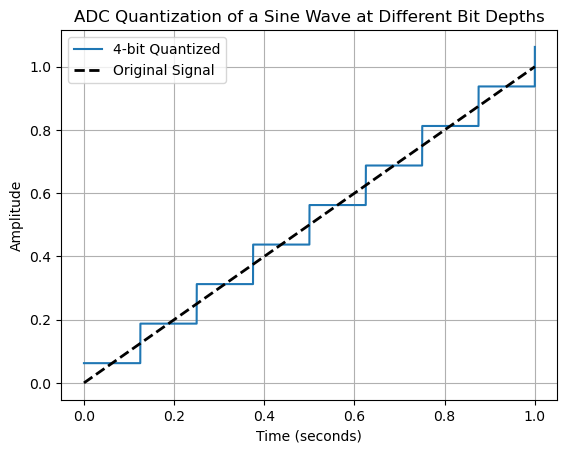

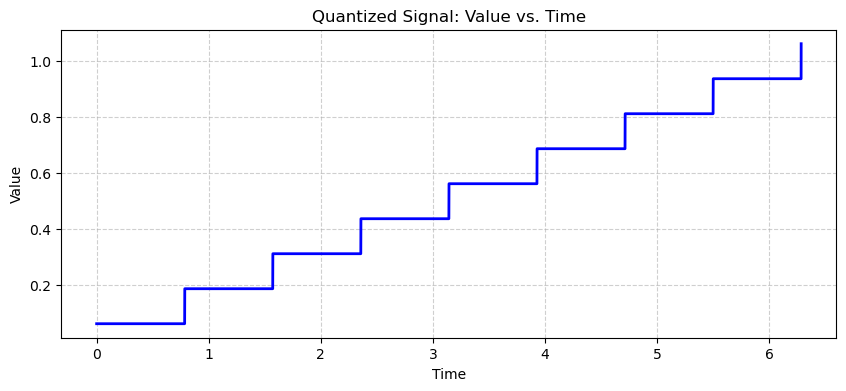

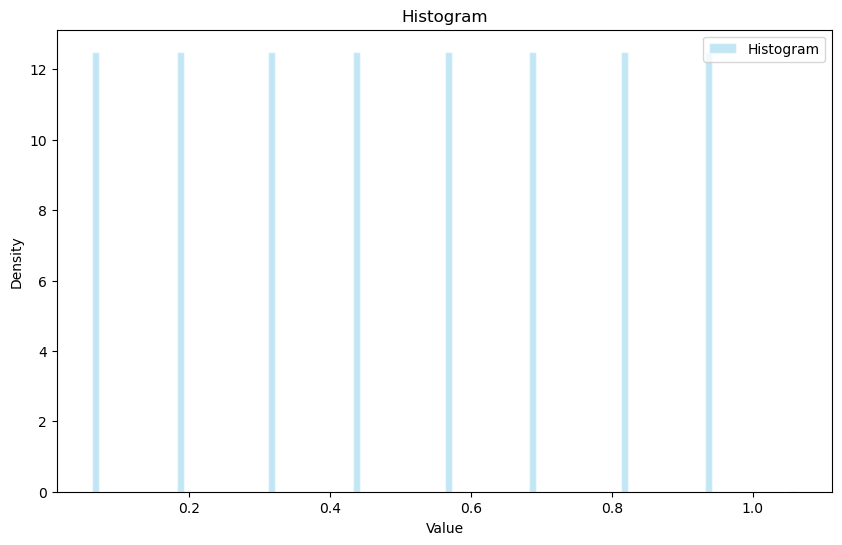

In [188]:
# Passing through ADC:
q_signal = ADC(ramp_signal, bits, Vref, t)
# print(q_signal)
display_histogram(q_signal, fs)

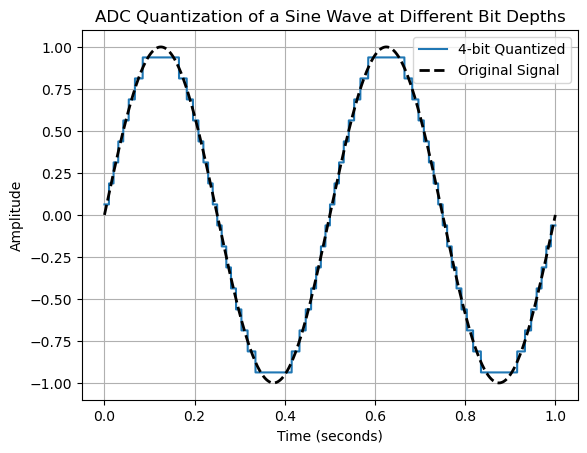

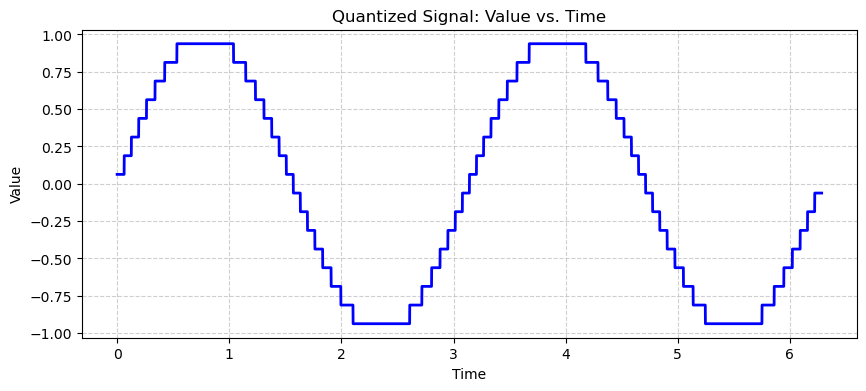

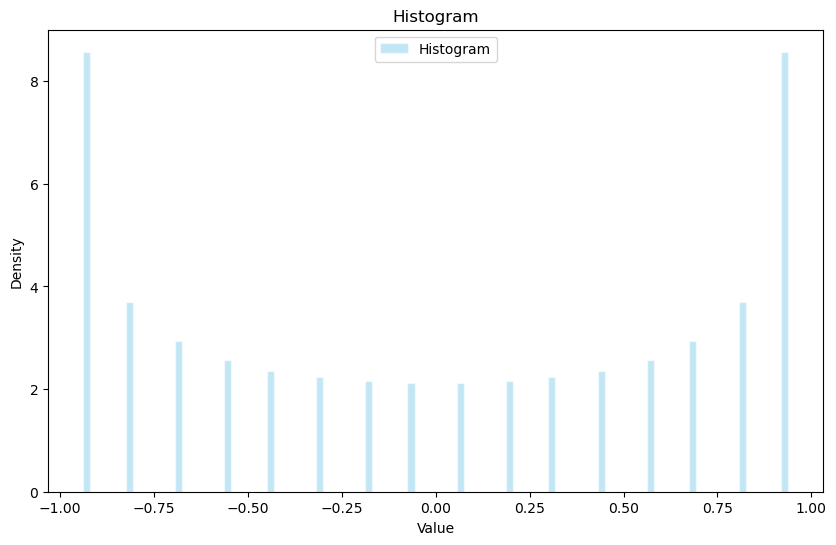

In [189]:
q_signal = ADC(analog_signal_sin, bits, Vref, t)
display_histogram(q_signal, fs)

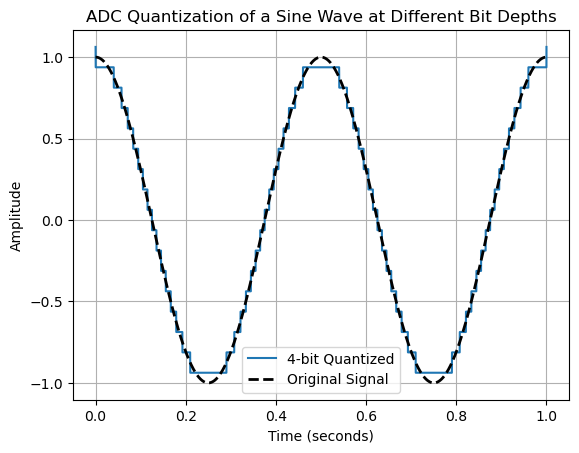

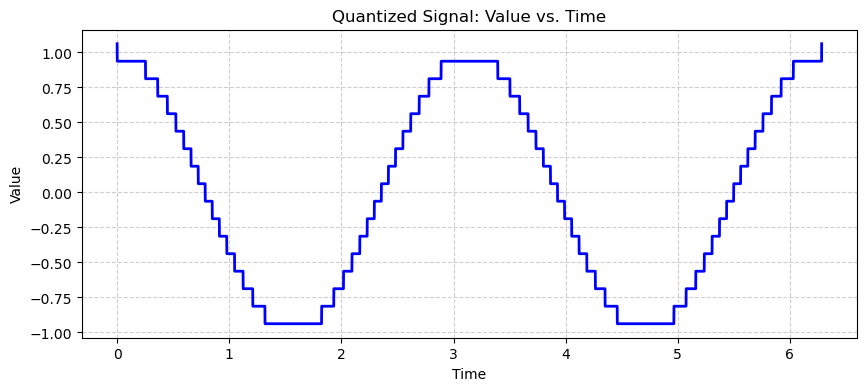

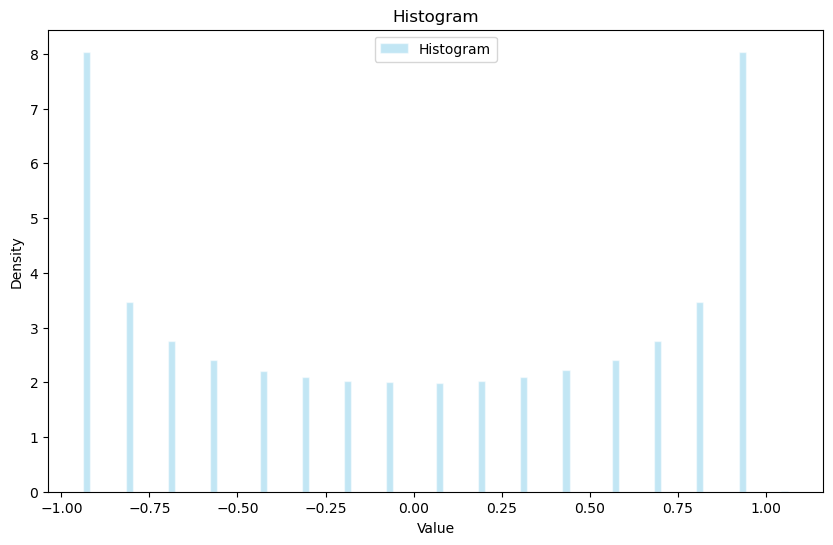

In [190]:
q_signal = ADC(analog_signal_cos, bits, Vref, t)
display_histogram(q_signal, fs)